✅ Data Loaded Successfully!

stores shape: (45, 3)
features shape: (8190, 12)
sales shape: (421570, 5)

--- STORES DATA SAMPLE ---


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875



--- FEATURES DATA SAMPLE ---


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False



--- SALES DATA SAMPLE ---


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False



--- Missing Values ---
Stores missing:
 Store    0
Type     0
Size     0
dtype: int64 

Features missing:
 Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64 

Sales missing:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64 

✅ Date columns converted to datetime format.

--- MERGED DATA SAMPLE ---


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_feat,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


Merged dataset shape: (421570, 17)

--- WEEKLY AGGREGATION SAMPLE ---


,Store,Dept,Week,Weekly_Sales,IsHoliday
0,1,1,2010-02-01,24924.50,False
1,1,1,2010-02-08,46039.49,True
2,1,1,2010-02-15,41595.55,False
3,1,1,2010-02-22,19403.54,False
4,1,1,2010-03-01,21827.90,False
5,1,1,2010-03-08,21043.39,False
6,1,1,2010-03-15,22136.64,False
7,1,1,2010-03-22,26229.21,False
8,1,1,2010-03-29,57258.43,False
9,1,1,2010-04-05,42960.91,False


Total weekly rows: 421570


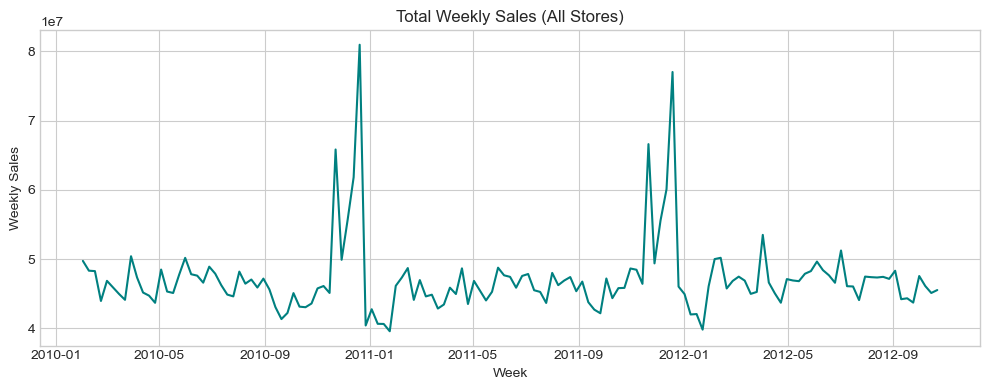

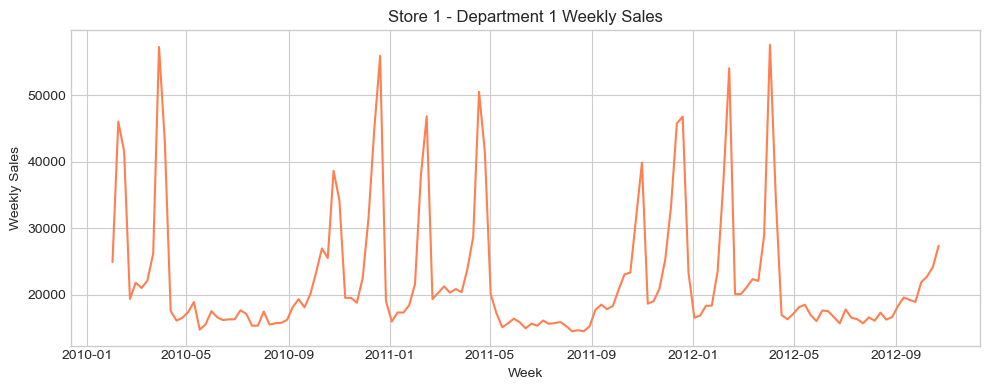


===== SUMMARY =====
Files loaded:
 - stores.csv: (45, 3)
 - features.csv: (8190, 12)
 - sales.csv: (421570, 6)

Missing value overview shown above.

Merged dataset shape: (421570, 17)
Weekly aggregation: 421570 rows

✅ Step 1 Completed: Data successfully loaded, merged, and explored.


In [4]:
# ===============================================
# FINAL PROJECT - STEP 1: DATA LOADING & EXPLORATION
# ===============================================

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')

# ===============================================
# 1️⃣ LOAD THE DATASETS
# ===============================================

# Update file paths as needed
stores = pd.read_csv("stores_data_set.csv")
features = pd.read_csv("Features_data_set.csv")
sales = pd.read_csv("sales_data_set.csv")

print("✅ Data Loaded Successfully!\n")
print(f"stores shape: {stores.shape}")
print(f"features shape: {features.shape}")
print(f"sales shape: {sales.shape}")

# ===============================================
# 2️⃣ PREVIEW THE FIRST FEW ROWS
# ===============================================

print("\n--- STORES DATA SAMPLE ---")
display(stores.head())

print("\n--- FEATURES DATA SAMPLE ---")
display(features.head())

print("\n--- SALES DATA SAMPLE ---")
display(sales.head())

# ===============================================
# 3️⃣ CHECK FOR MISSING VALUES
# ===============================================

print("\n--- Missing Values ---")
print("Stores missing:\n", stores.isnull().sum(), "\n")
print("Features missing:\n", features.isnull().sum(), "\n")
print("Sales missing:\n", sales.isnull().sum(), "\n")

# ===============================================
# 4️⃣ CONVERT DATE COLUMNS TO DATETIME FORMAT
# ===============================================

# Try converting date columns automatically
for df in [features, sales]:
    for col in df.columns:
        if 'date' in col.lower():
            df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)

print("✅ Date columns converted to datetime format.")

# ===============================================
# 5️⃣ MERGE DATASETS (Sales → Features → Stores)
# ===============================================

merged = (
    sales.merge(features, on=['Store', 'Date'], how='left', suffixes=('', '_feat'))
          .merge(stores, on='Store', how='left', suffixes=('', '_store'))
)

print("\n--- MERGED DATA SAMPLE ---")
display(merged.head())
print(f"Merged dataset shape: {merged.shape}")

# ===============================================
# 6️⃣ WEEKLY AGGREGATION (Per Store + Department)
# ===============================================

# Ensure sales['Date'] is datetime
sales['Date'] = pd.to_datetime(sales['Date'], dayfirst=True, errors='coerce')

# Extract week start date
sales['Week'] = sales['Date'].dt.to_period('W').apply(lambda r: r.start_time)

# Aggregate
weekly_sales = (
    sales.groupby(['Store', 'Dept', 'Week'])
         .agg({'Weekly_Sales': 'sum', 'IsHoliday': 'max'})
         .reset_index()
)

print("\n--- WEEKLY AGGREGATION SAMPLE ---")
display(weekly_sales.head(10))
print(f"Total weekly rows: {weekly_sales.shape[0]}")

# ===============================================
# 7️⃣ QUICK VISUALIZATIONS
# ===============================================

# Total weekly sales over time (all stores)
weekly_total = (
    weekly_sales.groupby('Week')['Weekly_Sales']
                .sum()
                .reset_index()
)

plt.figure(figsize=(10,4))
plt.plot(weekly_total['Week'], weekly_total['Weekly_Sales'], color='teal')
plt.title('Total Weekly Sales (All Stores)')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.show()

# Example: one store and department
sample = weekly_sales[(weekly_sales['Store']==1) & (weekly_sales['Dept']==1)]

plt.figure(figsize=(10,4))
plt.plot(sample['Week'], sample['Weekly_Sales'], color='coral')
plt.title('Store 1 - Department 1 Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.show()

# ===============================================
# 8️⃣ SUMMARY TEXT
# ===============================================

print("\n===== SUMMARY =====")
print(f"Files loaded:\n - stores.csv: {stores.shape}\n - features.csv: {features.shape}\n - sales.csv: {sales.shape}")
print("\nMissing value overview shown above.")
print(f"\nMerged dataset shape: {merged.shape}")
print(f"Weekly aggregation: {weekly_sales.shape[0]} rows")
print("\n✅ Step 1 Completed: Data successfully loaded, merged, and explored.")
